In [1]:
#export 
suppressMessages(source("exp/nb_05.R"))

Warning message:
“package ‘survival’ was built under R version 4.1.1”


In [2]:
#export
library("ggsci")
library("ggridges")

In [3]:
library(stringr)

### Helper functions

In [4]:
get_c_index  = function (resampler) 
{
    mean(resampler$measures.test$cindex)
}

In [5]:
#export
read_metalearners = function(type, df_names){
    mls = vector("list", length(df_names))
    for (i in 1:length(df_names)){
        filename = paste(data_path,"metalearners_",type,"_",df_names[[i]],".rds", sep="")
        print(filename)
        mls[[i]] = readRDS(filename)
    }
    mls
}

In [6]:
#export
rep_df_names = function(dfs, n = 100, number_of_metalearners = 9){
    name_numb_pats = map(dfs, function(df) dim(df[[1]])[1])
    df_names = vector("list", length(dfs))
    for(i in 1:length(dfs)){
        df_names[[i]] = rep(names(name_numb_pats)[[i]], (n*number_of_metalearners))
    }
    df_names  
}

In [7]:
#export
get_stats_df = function(metalearner, index){
    c_indices = bind_rows(map(1:length(metalearner), function(i) get_c_index_for_algs(metalearner[[i]]$resamplers)))
    c_indices = c_indices %>% gather(Learner, Cindex)

    df = cbind(rep(paste0("Random ", index), length(metalearner)), c_indices )
    colnames(df) = c("Dataset", colnames(c_indices))
    df
}

In [8]:
#export
get_stats = function(MLS, n){
    df_names = unlist(rep_df_names(dfs, n = n))
    stats = bind_rows(map2(MLS,1:length(MLS), get_stats_df))
    stats = cbind(df_names, stats)
    names(stats) = c("Dataset", "Selection", "Learner", "C_Index")
    stats
}

### Results

In [9]:
dfs = readRDS(paste(data_path,"dfs_random.rds", sep=""))

In [10]:
df_names = names(dfs)

In [11]:
df_names

[1] "METABRIC" "GSE11121" "GSE96058" "GSE7390"  "GSE9893"  "NKI"      "TCGA"    
[8] "GSE4922"

## 1) Random

In [12]:
#export
data_path = "../data/metalearners/"

In [13]:
type = "random"

In [14]:
MLS = read_metalearners(type, df_names)

[1] "../data/metalearners/metalearners_random_METABRIC.rds"
[1] "../data/metalearners/metalearners_random_GSE11121.rds"
[1] "../data/metalearners/metalearners_random_GSE96058.rds"
[1] "../data/metalearners/metalearners_random_GSE7390.rds"
[1] "../data/metalearners/metalearners_random_GSE9893.rds"
[1] "../data/metalearners/metalearners_random_NKI.rds"
[1] "../data/metalearners/metalearners_random_TCGA.rds"
[1] "../data/metalearners/metalearners_random_GSE4922.rds"


In [15]:
stats = get_stats(MLS, n=100)

In [22]:
stats$Selection = rep(1:100, 72)

In [33]:
#stats[stats$Dataset=="GSE11121" & !is.na(stats$C_Index),]

In [34]:
stats[stats$C_Index>=0.81 & !is.na(stats$C_Index),]

,Dataset,Selection,Learner,C_Index
,<chr>,<int>,<chr>,<dbl>
983,GSE11121,83,Cox_PH_model,0.8138138
1008,GSE11121,8,Ridge,0.8162975
1199,GSE11121,99,Elastic_Net,0.8186488
1446,GSE11121,46,Gradient_Boosting_linear_model_based,0.8333284
1638,GSE11121,38,Maximally_selected_rank_statistics_Random_Forests,0.8355087
5515,TCGA,15,Ridge,0.8133894
5548,TCGA,48,Ridge,0.8219450
5646,TCGA,46,Elastic_Net,0.8166666
5868,TCGA,68,Gradient_Boosting_tree_based,0.8241061


In [25]:
saveRDS(stats, file = "../data_for_figures/stats_random.rds")

Picking joint bandwidth of 0.0231



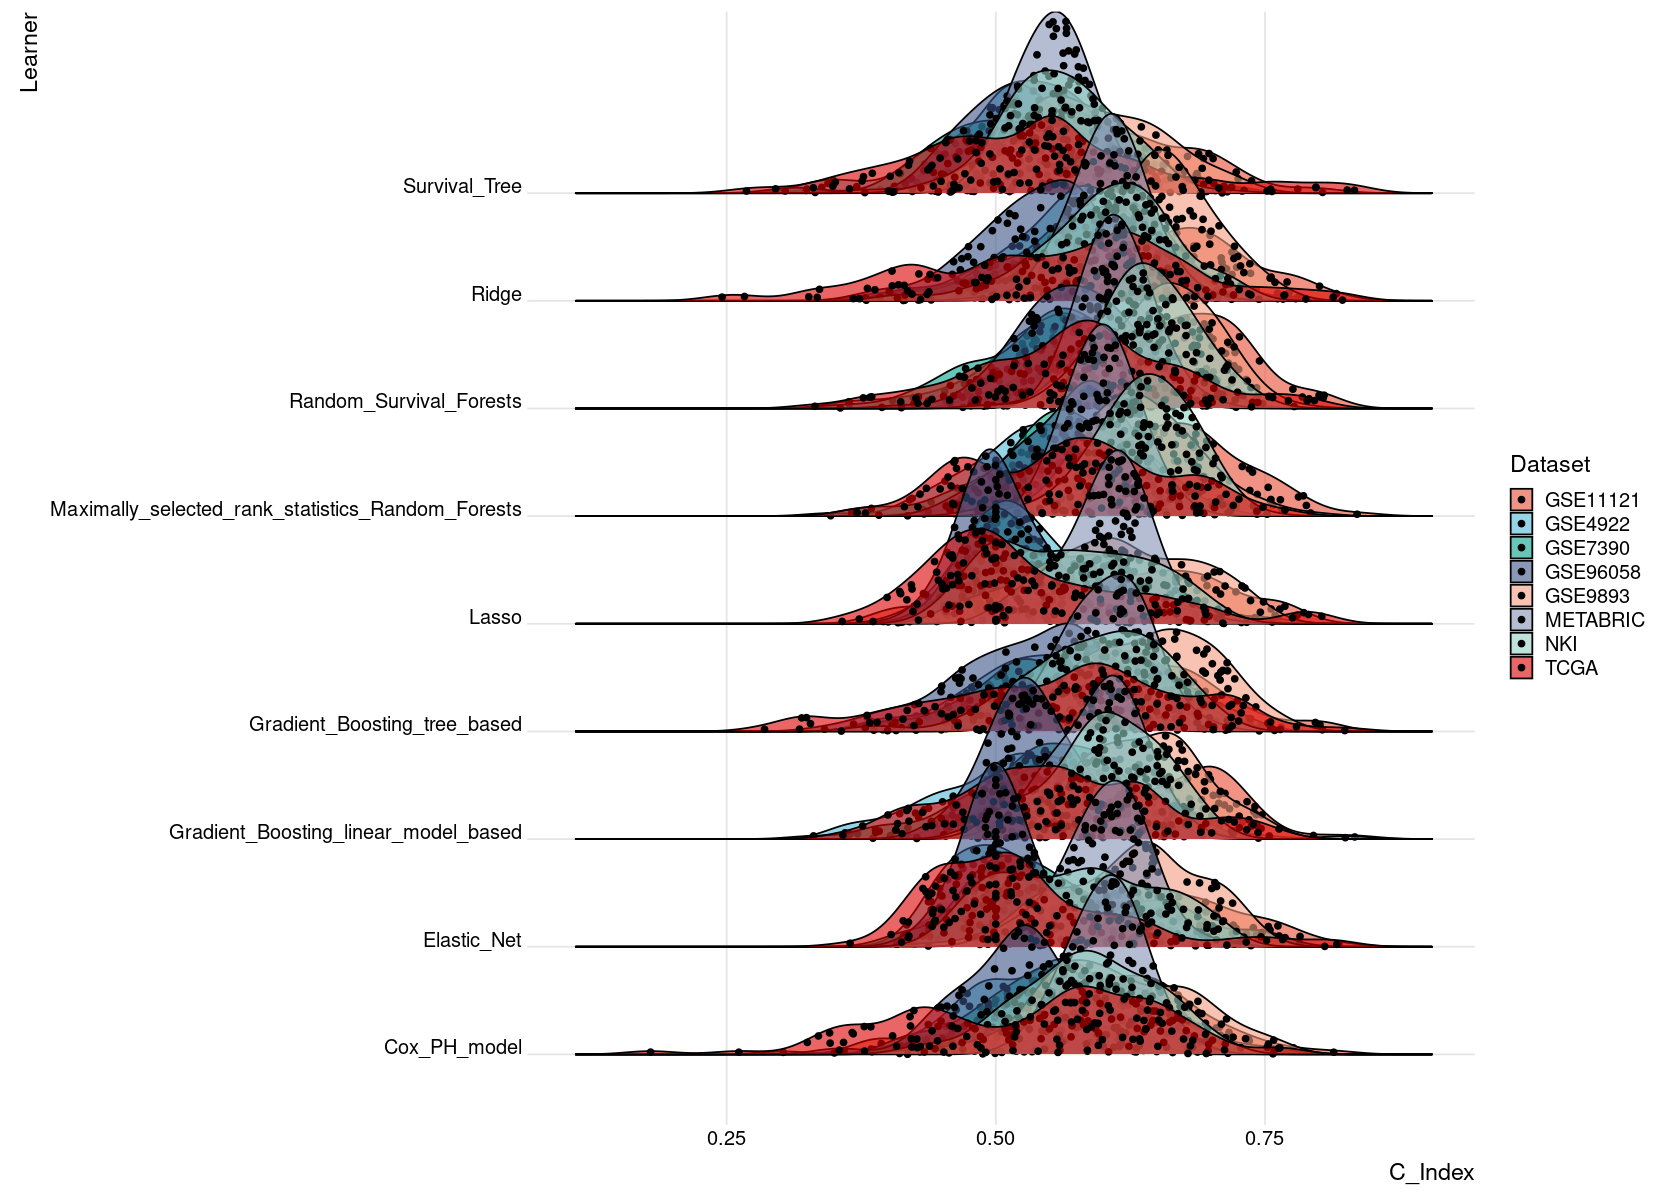

In [17]:
ggplot(stats, aes(x = C_Index, y = Learner, fill = Dataset)) + 
       geom_density_ridges(jittered_points = TRUE) +
       #geom_histogram()+
       theme_ridges() + 
       #theme(legend.position = "none")+
       scale_fill_npg(alpha=0.6)

## 2) Known gene lists

In [35]:
MLS_signatures = read_metalearners("signatures", df_names)

[1] "../data/metalearners/metalearners_signatures_METABRIC.rds"
[1] "../data/metalearners/metalearners_signatures_GSE11121.rds"
[1] "../data/metalearners/metalearners_signatures_GSE96058.rds"
[1] "../data/metalearners/metalearners_signatures_GSE7390.rds"
[1] "../data/metalearners/metalearners_signatures_GSE9893.rds"
[1] "../data/metalearners/metalearners_signatures_NKI.rds"
[1] "../data/metalearners/metalearners_signatures_TCGA.rds"
[1] "../data/metalearners/metalearners_signatures_GSE4922.rds"


In [36]:
stats_signatures = get_stats(MLS_signatures, n = 33)

In [39]:
dim(stats_signatures)

[1] 2376    4

In [45]:
head(stats_signatures)

,Dataset,Selection,Learner,C_Index
,<chr>,<chr>,<chr>,<dbl>
1,METABRIC,B-cell:IL8 ratio,Cox_PH_model,0.6004034
2,METABRIC,Breast cancer index,Cox_PH_model,0.6525083
3,METABRIC,Cell cycle pathway signature,Cox_PH_model,0.6601291
4,METABRIC,92-gene predictor,Cox_PH_model,0.6592735
5,METABRIC,EndoPredict assay,Cox_PH_model,0.6831656
6,METABRIC,GCNs of MET and HGF,Cox_PH_model,0.5320137


In [41]:
33*length(unique(stats_signatures$Learner))*length(unique(stats_signatures$Dataset))

[1] 2376

In [43]:
signs = c('B-cell:IL8 ratio ', 'Breast cancer index ', 'Cell cycle pathway signature ', 
          '92-gene predictor ', 'EndoPredict assay ', 'GCNs of MET and HGF ', 
          '8-gene genomic grade index ', '97-gene genomic grade index ', 
          '158-gene HER2-derived prognostic predictor ', 'HOXB13:IL17 BR ratio ', 
          '186-invasivenessgene signature ', 'IHC4 Score ', '7-gene immune response module ', 
          '85-gene signature ', '54-gene lung metastasis signature ', 'MAGE-A ', 
          '70-gene signature ', '368-gene medullary breast cancer like signature ', 
          '14-gene metastasis score ', 'Multigene HRneg/Tneg signature ', '26-gene signature ', 
          '264-gene signature ', '512-gene signature ', '32-gene p53 status signature ', 
          'PAM50 assay ', '64-gene expression signature ', '127-gene classifier ', 
          '21-gene signature ', '26-gene stroma-derived prognostic predictor ', '8-gene score ', 
          'T-cell metagene ', '28-gene expression profile ', '76-gene signature ')

In [44]:
stats_signatures$Selection = rep(signs, length(unique(stats_signatures$Learner))*length(unique(stats_signatures$Dataset)))

In [46]:
saveRDS(stats_signatures, file = "../data_for_figures/stats_signatures.rds")

Picking joint bandwidth of 0.032



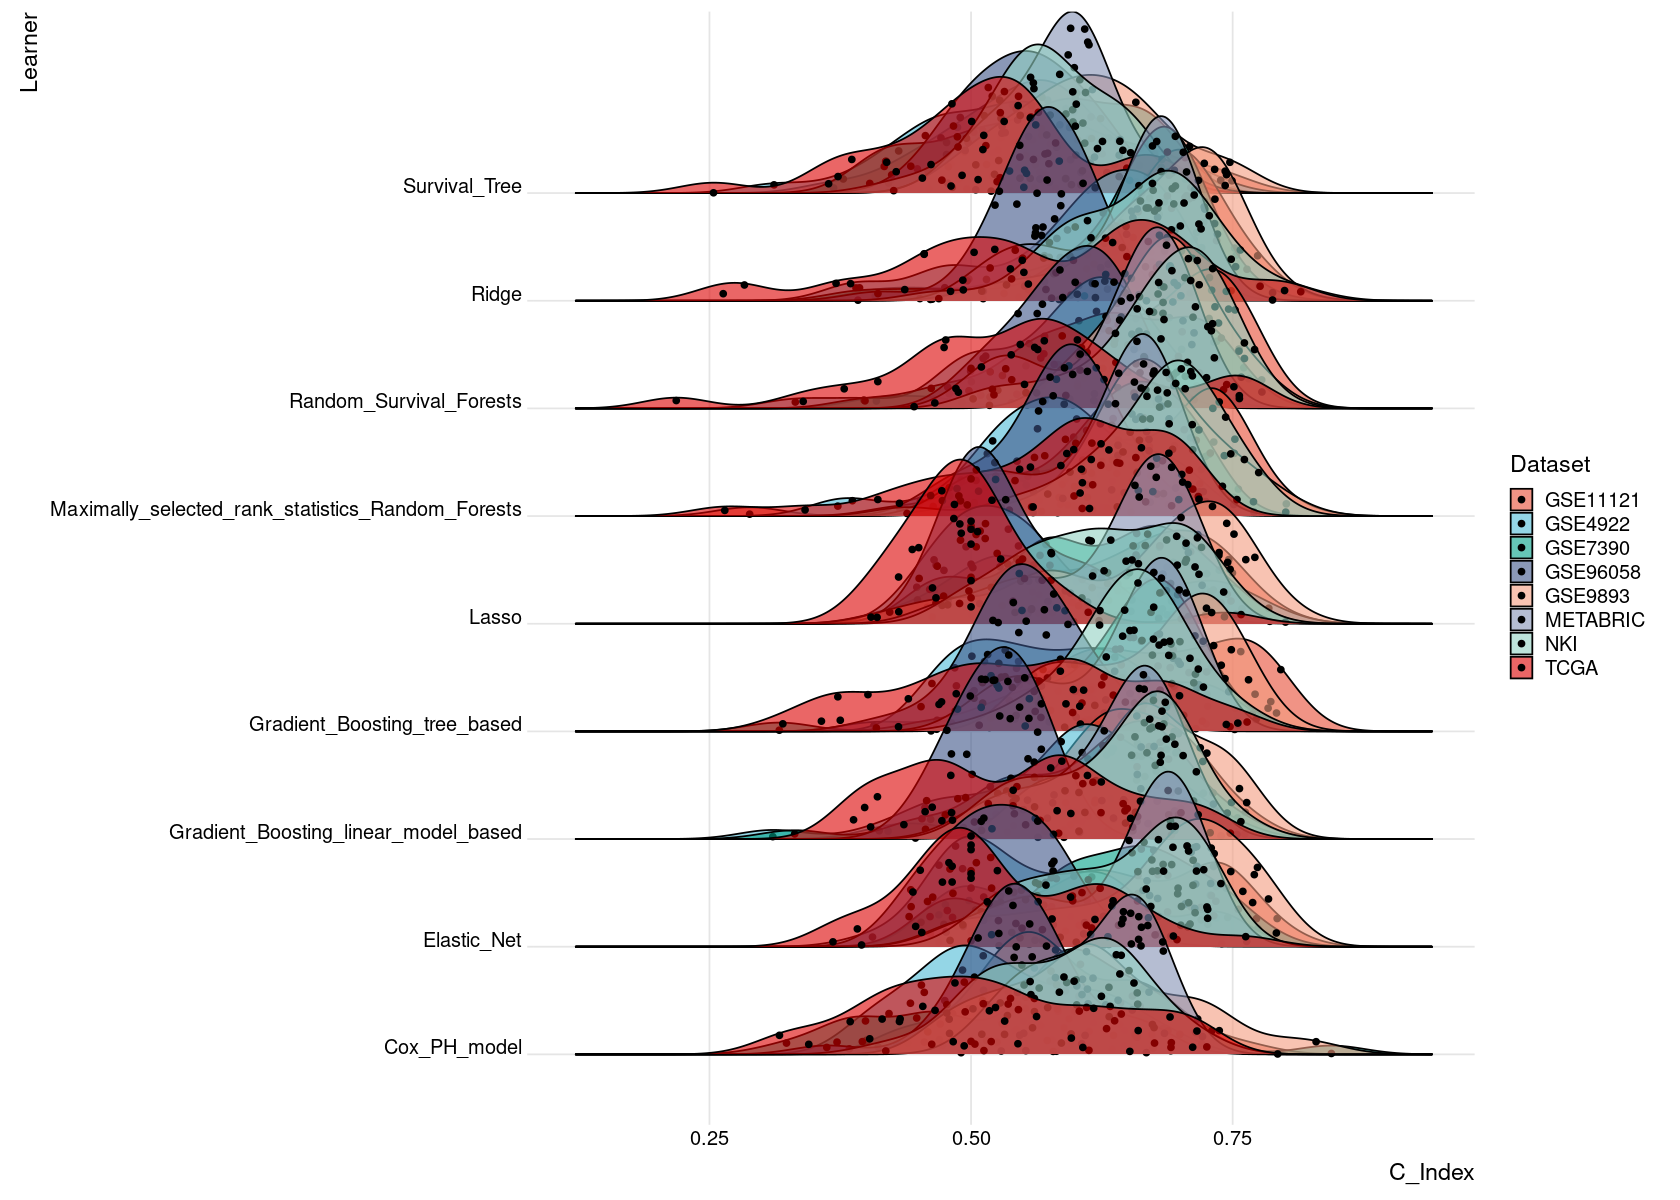

In [21]:
ggplot(stats_signatures, aes(x = C_Index, y = Learner, fill = Dataset)) + 
       geom_density_ridges(jittered_points = TRUE) +
       #geom_density_ridges(stat = "binline", bins = 10) +
       theme_ridges() + 
       scale_fill_npg(alpha=0.6)

## 3) Gene lists from state-of-the-art algorithms

In [9]:
path = "../data/metalearners/metalearners_from_feature_selections/"

In [10]:
read_metalearners_from_file_list = function(file_list){
    mls = vector("list", length(file_list))
    for (i in 1:length(file_list)){
        filename = file_list[[i]]
        #print(filename)
        mls[[i]] = readRDS(filename)
    }
    mls
}

In [11]:
get_c_index_abs = function(resampler){
    #values below 0.5 are good antipredictiors: convert them into predictors
    mean(abs(resampler$measures.test$cindex - 0.5) + 0.5)
}

In [12]:
find_models = function(vec){
    out = vec
    models = c("Cox_PH_model",                                     
             "Ridge",                                            
             "Elastic_Net",                                      
             "Lasso",                                            
             "Gradient_Boosting_tree_based",                     
             "Gradient_Boosting_linear_model_based",             
             "Random_Survival_Forests",                          
             "Maximally_selected_rank_statistics_Random_Forests",
             "Survival_Tree")
    for (i in 1:length(models)){
        out[grep(models[[i]], vec)] = models[[i]]
    }
    return(out)
    
}

In [13]:
get_stats = function(dataset_name = "GSE96058"){
    file_names = list.files(path, pattern = dataset_name, full.names=TRUE)
    file_names_red = list.files(path, pattern = dataset_name, full.names=FALSE)
    mls_mb = read_metalearners_from_file_list(file_names)
    c_indices = map(mls_mb, get_c_index)
    c_indices_df = as.data.frame(unlist(file_names_red))
    names(c_indices_df) = c("file_name")
    c_indices_df$C_index = as.numeric(c_indices) 
    c_indices_df$ind = 1:length(c_indices)
    c_indices_df$model = find_models(c_indices_df$file_name)
    return(c_indices_df)
}

## Check metalearners

In [14]:
check_learner = function(ml){
    check = "survival_time.1" %in% sapply(ml$models, getFilteredFeatures) 
    check
}

In [15]:
check_metalearners = function(dataset_name = "METABRIC"){
    file_list = list.files(path, pattern = dataset_name, full.names=TRUE)
    l = vector("list", length(file_list))
    j = 1
    for (i in 1:length(file_list)){
        filename = file_list[[i]]
        if (check_learner(readRDS(filename))){
            l[[j]] = gsub(filename, pattern="//", replacement="/", fixed=TRUE)
            j = j+1
        }
    }
    Filter(Negate(is.null), l)
}


In [16]:
names(dfs)

[1] "METABRIC" "GSE11121" "GSE96058" "GSE7390"  "GSE9893"  "NKI"      "TCGA"    
[8] "GSE4922"

In [17]:
failed_filepaths = check_metalearners(dataset_name = names(dfs)[[8]])

In [18]:
failed_filepaths

list()

In [23]:
#for (i in 1:length(failed_filepaths)){
#    system(paste("rm", failed_filepaths[[i]]))
#}

## Metabric

Picking joint bandwidth of 0.0233



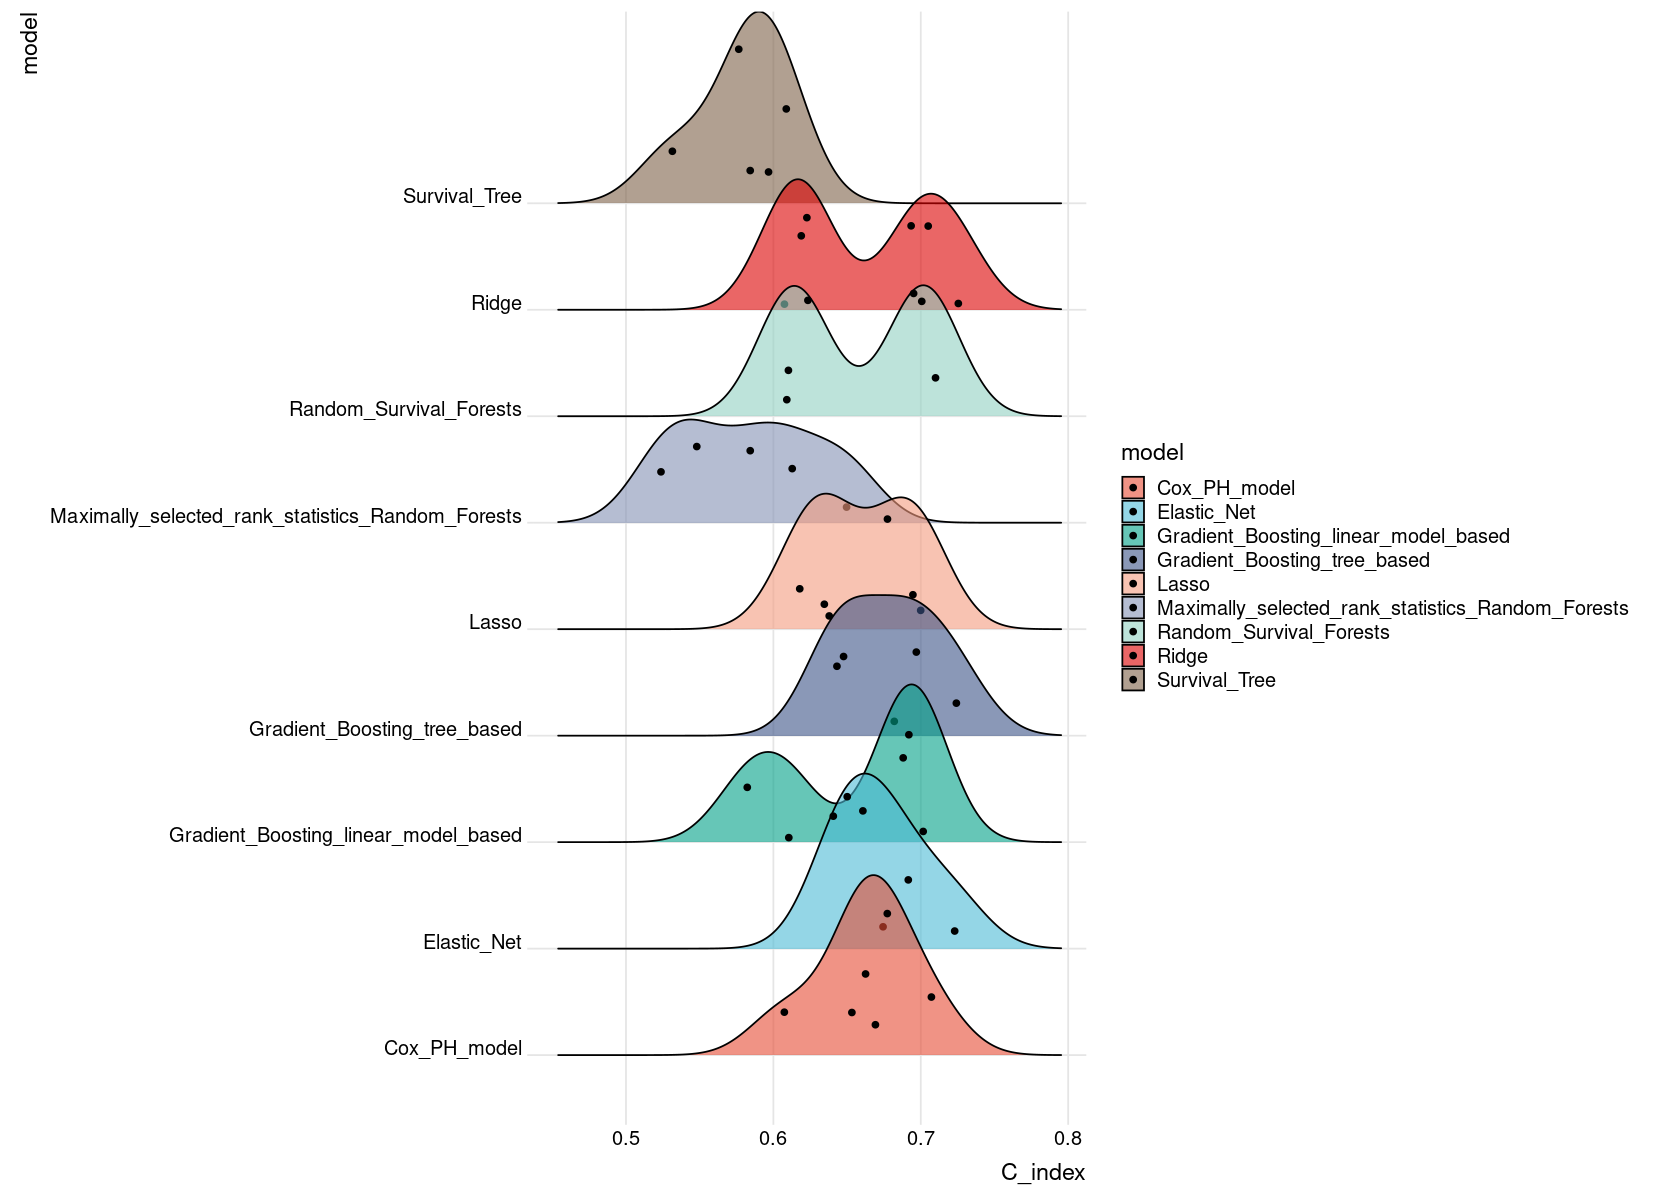

In [24]:
c_indices_df1 = get_stats(dataset_name = names(dfs)[1])

ggplot(c_indices_df1, aes(x = C_index, y = model, fill = model)) + 
       geom_density_ridges(jittered_points = TRUE) +
       #geom_density_ridges(stat = "binline", bins = 10) +
       theme_ridges() + 
       scale_fill_npg(alpha=0.6)

## GSE11121

Picking joint bandwidth of 0.0374



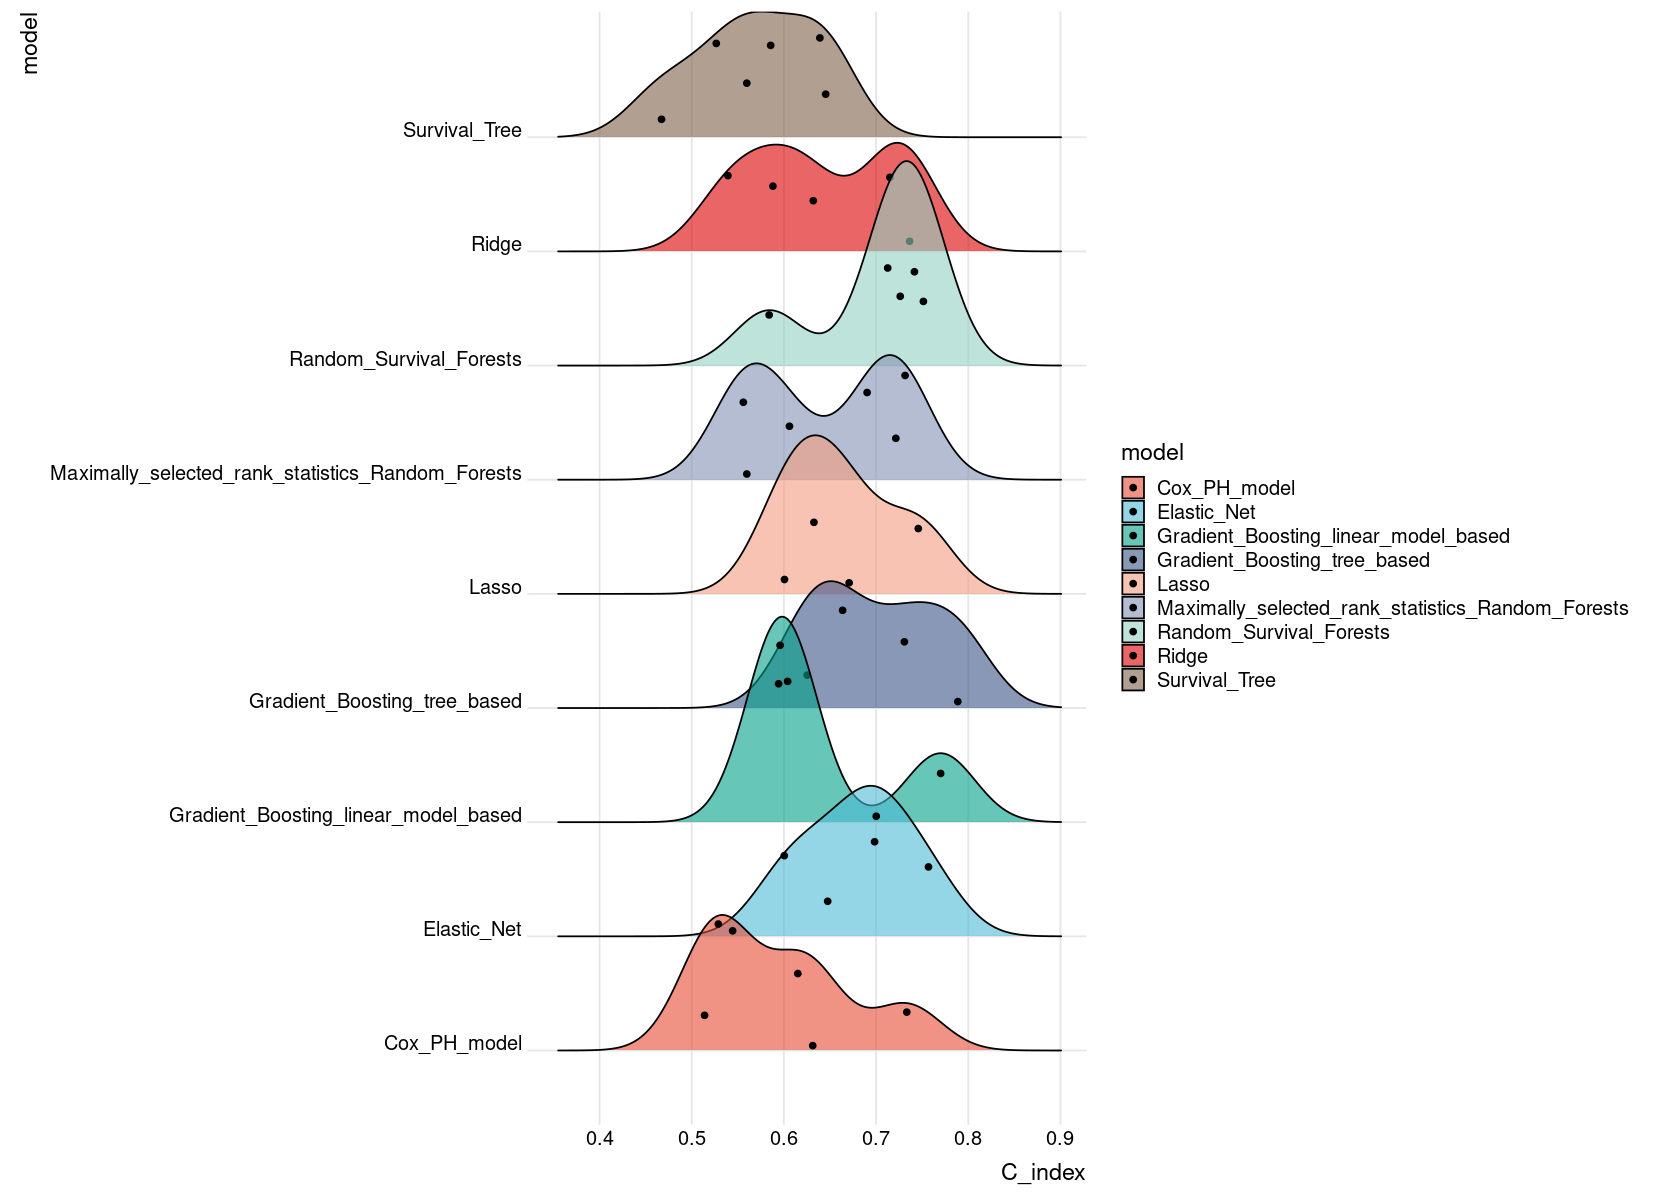

In [25]:
c_indices_df2 = get_stats(dataset_name = names(dfs)[2])

ggplot(c_indices_df2, aes(x = C_index, y = model, fill = model)) + 
       geom_density_ridges(jittered_points = TRUE) +
       #geom_density_ridges(stat = "binline", bins = 10) +
       theme_ridges() + 
       scale_fill_npg(alpha=0.6)

### GSE96058

Picking joint bandwidth of 0.0288



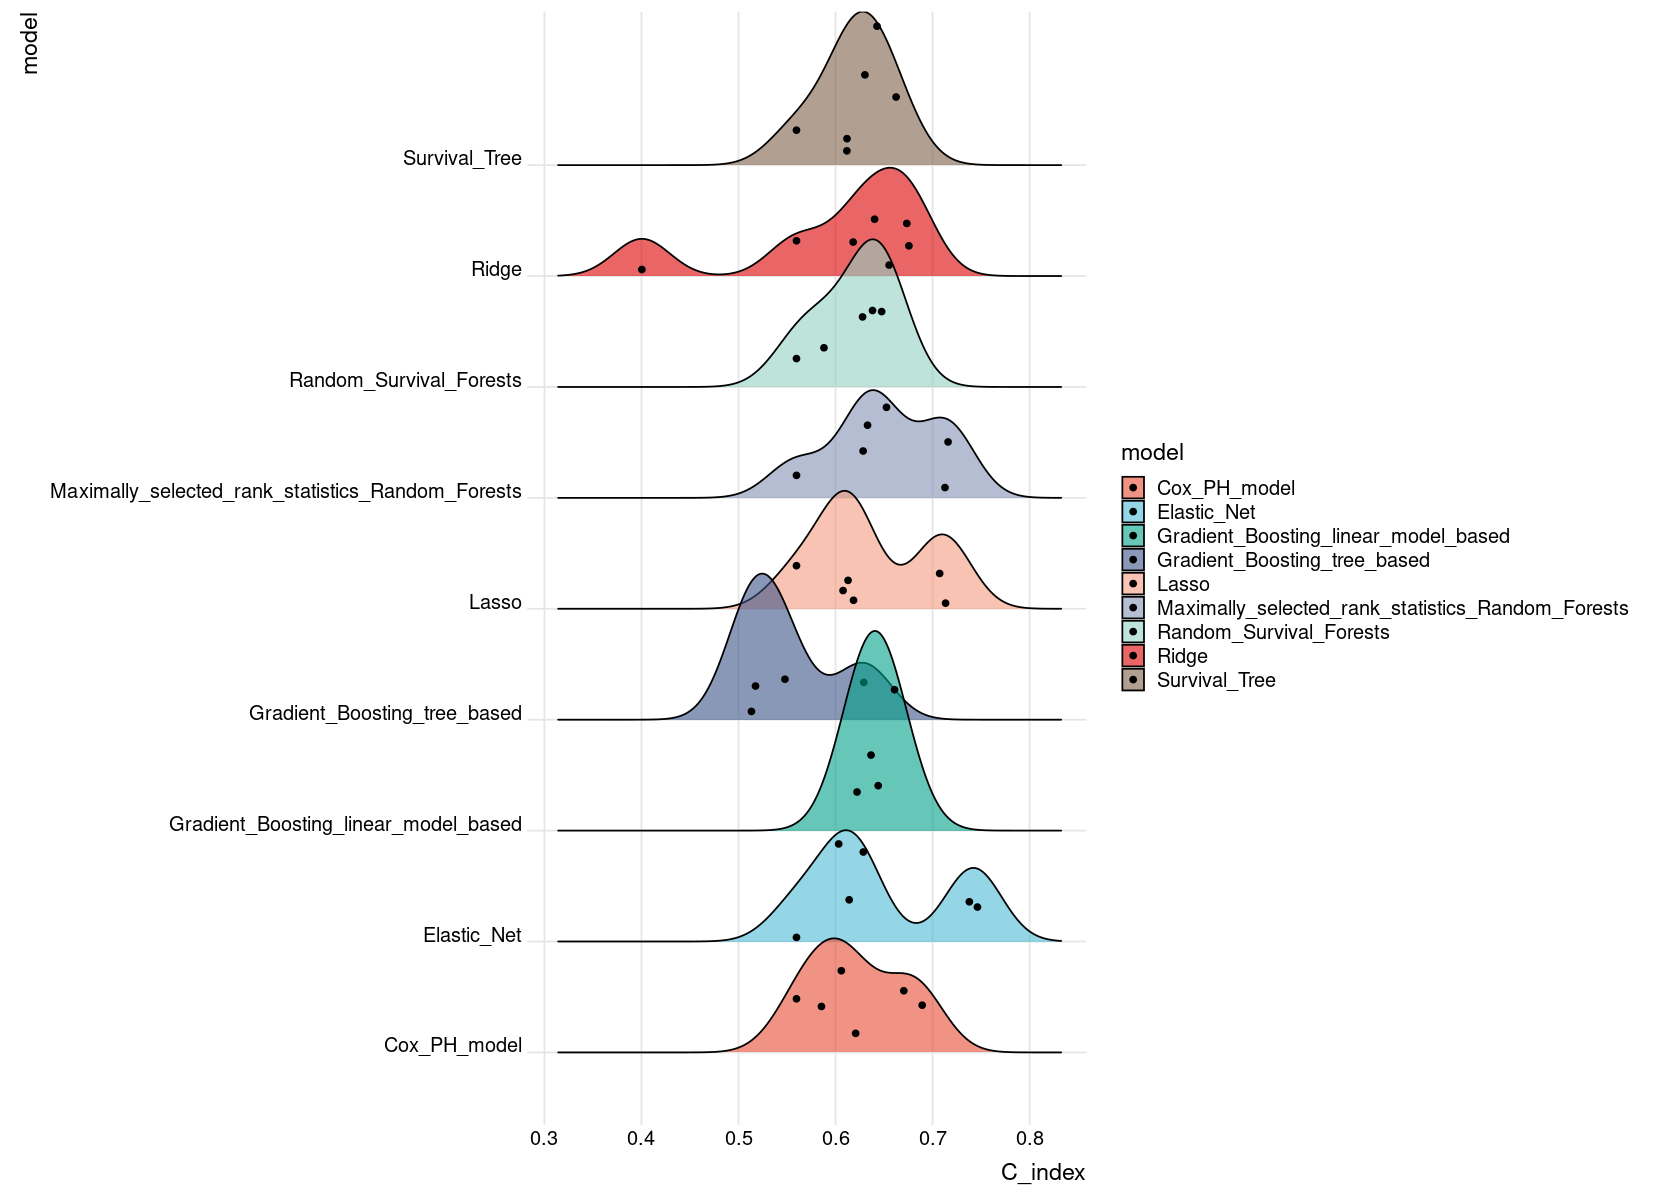

In [26]:
c_indices_df3 = get_stats(dataset_name = names(dfs)[3])

ggplot(c_indices_df3, aes(x = C_index, y = model, fill = model)) + 
       geom_density_ridges(jittered_points = TRUE) +
       #geom_density_ridges(stat = "binline", bins = 10) +
       theme_ridges() + 
       scale_fill_npg(alpha=0.6)

### GSE7390

Picking joint bandwidth of 0.0346



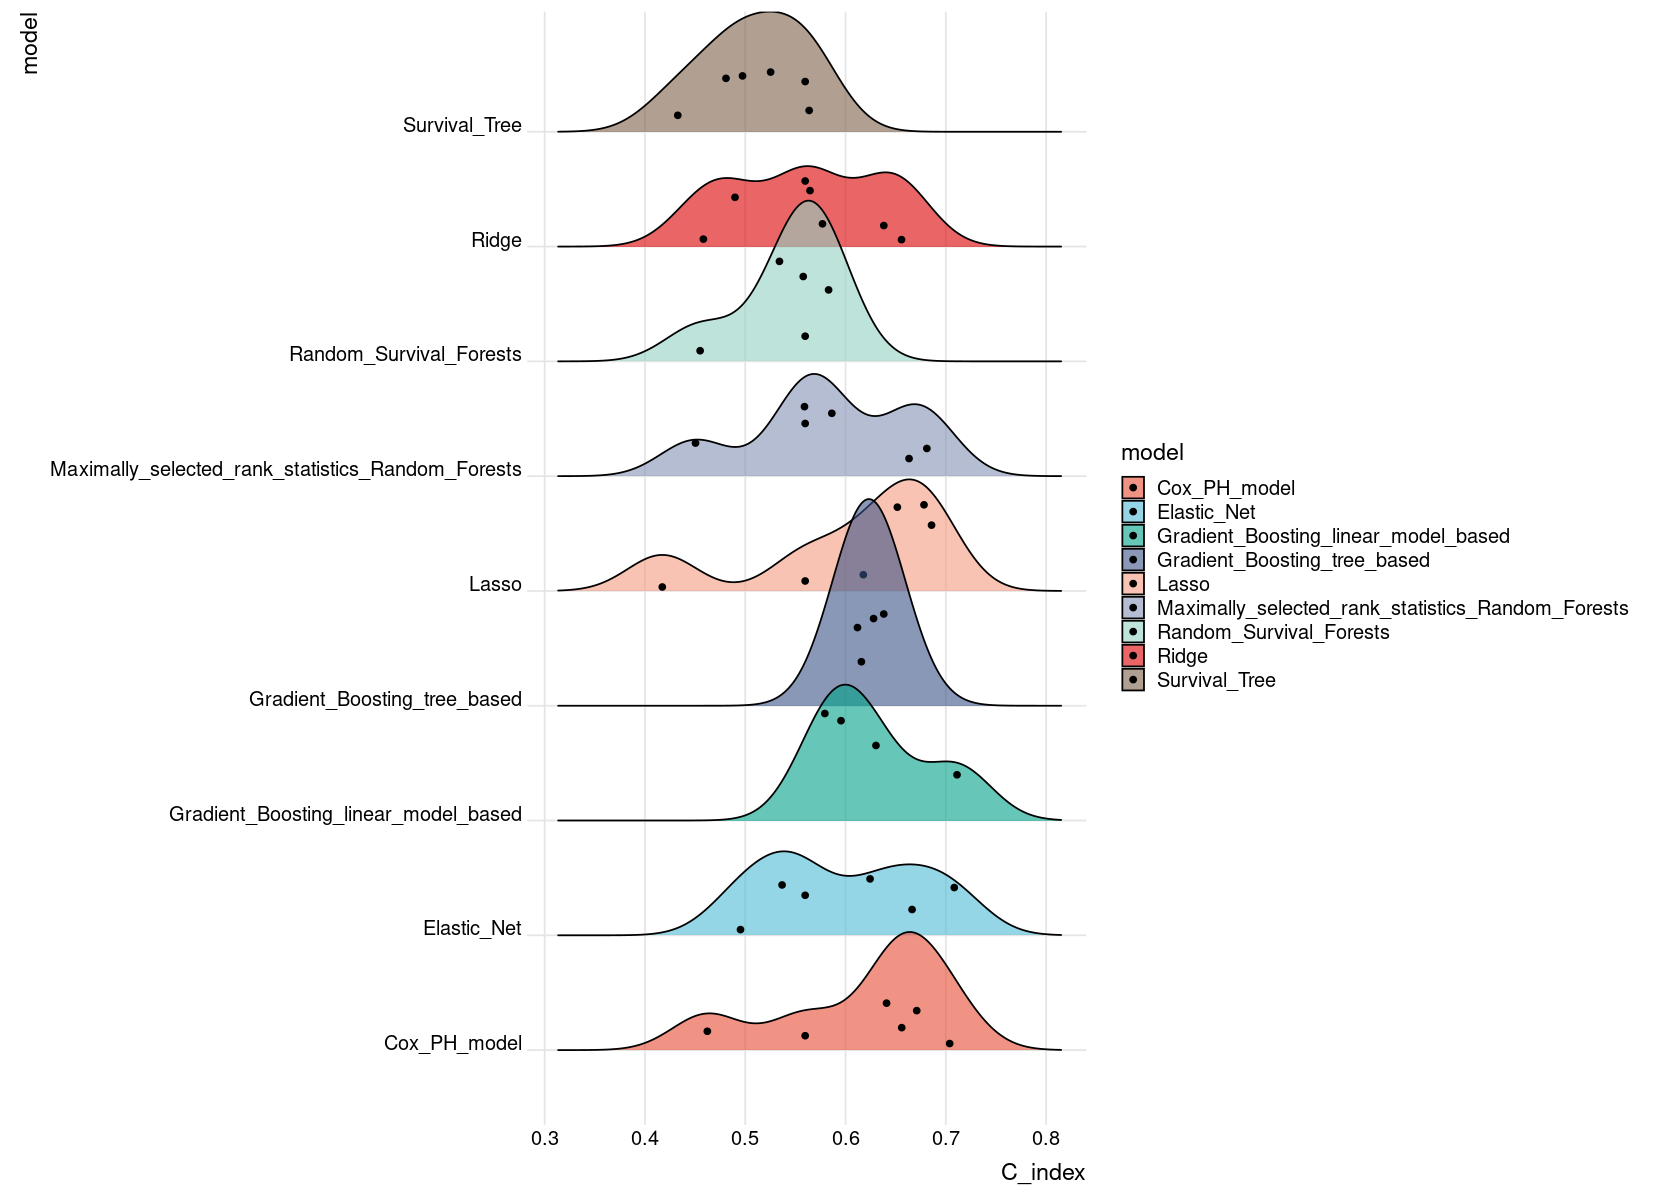

In [27]:
c_indices_df4 = get_stats(dataset_name = names(dfs)[4])

ggplot(c_indices_df4, aes(x = C_index, y = model, fill = model)) + 
       geom_density_ridges(jittered_points = TRUE) +
       #geom_density_ridges(stat = "binline", bins = 10) +
       theme_ridges() + 
       scale_fill_npg(alpha=0.6)

### GSE9893

Picking joint bandwidth of 0.0256



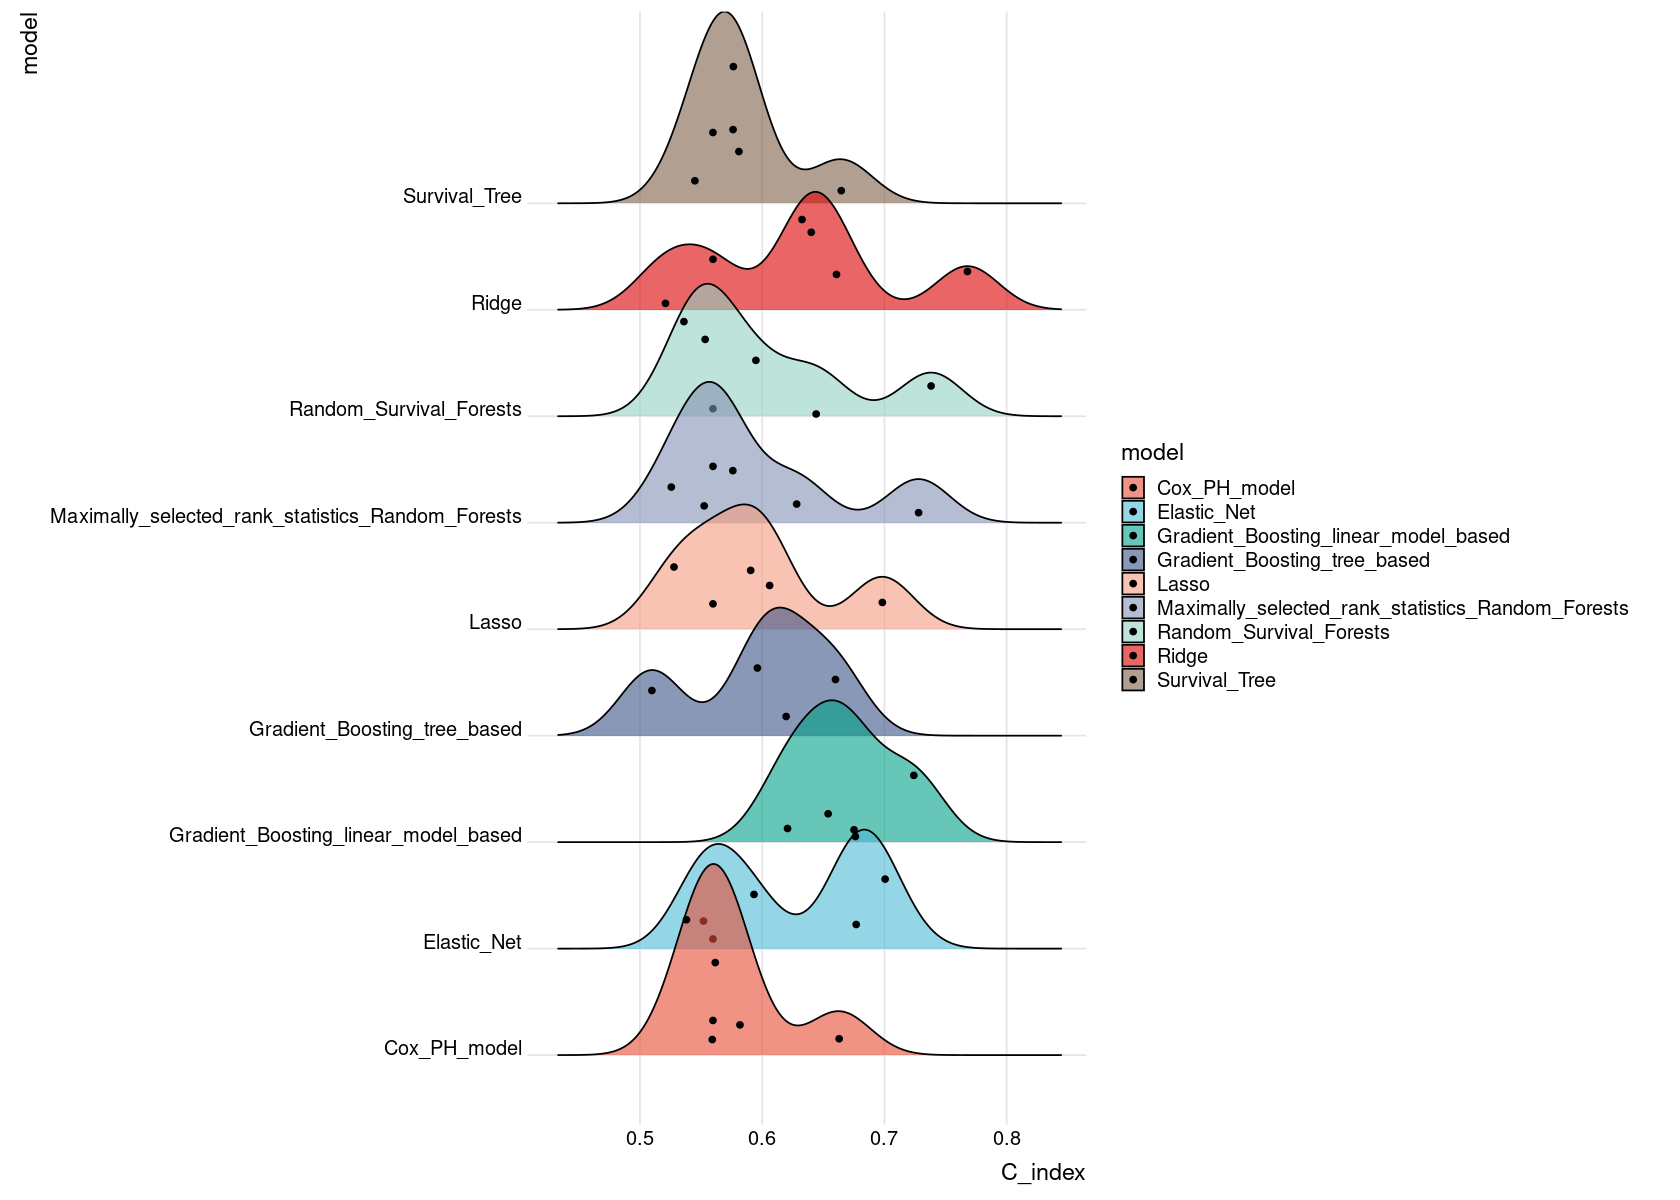

In [28]:
c_indices_df5 = get_stats(dataset_name = names(dfs)[5])

ggplot(c_indices_df5, aes(x = C_index, y = model, fill = model)) + 
       geom_density_ridges(jittered_points = TRUE) +
       #geom_density_ridges(stat = "binline", bins = 10) +
       theme_ridges() + 
       scale_fill_npg(alpha=0.6)

### NKI

Picking joint bandwidth of 0.0253



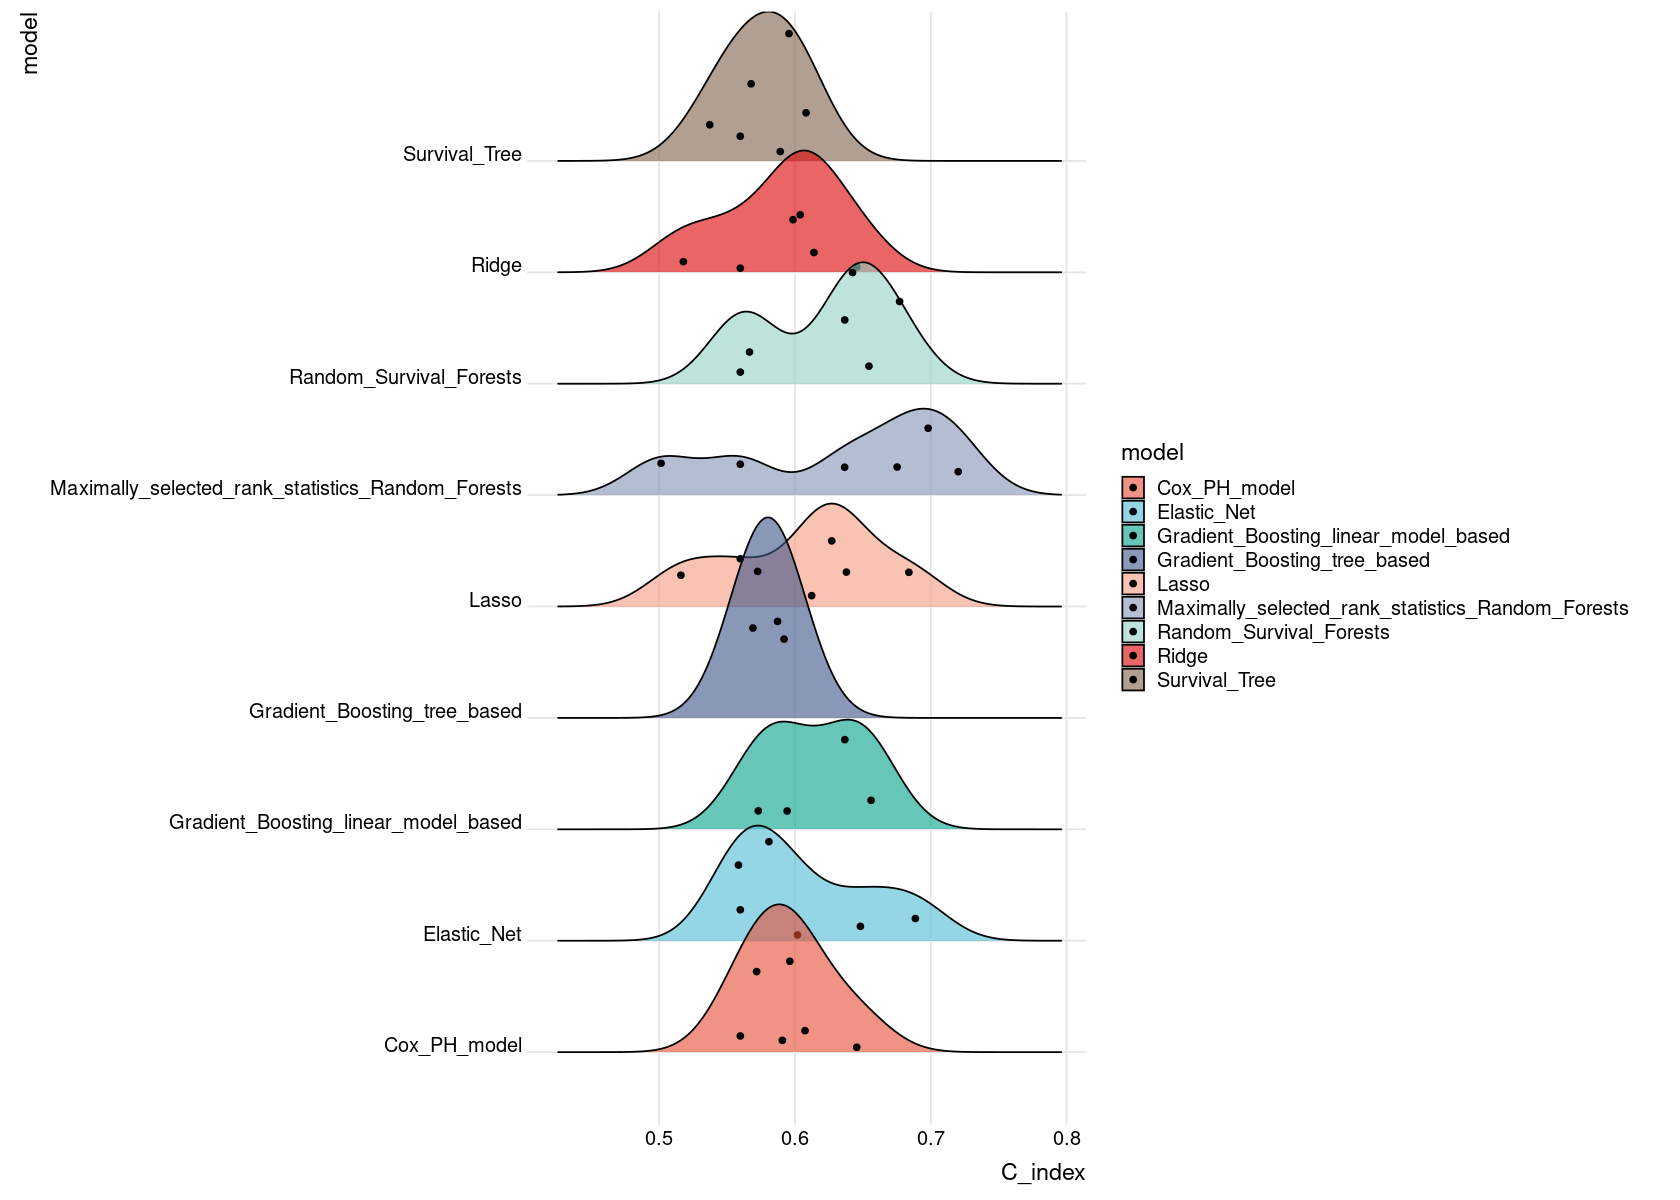

In [29]:
c_indices_df6 = get_stats(dataset_name = names(dfs)[6])

ggplot(c_indices_df6, aes(x = C_index, y = model, fill = model)) + 
       geom_density_ridges(jittered_points = TRUE) +
       #geom_density_ridges(stat = "binline", bins = 10) +
       theme_ridges() + 
       scale_fill_npg(alpha=0.6)

### TCGA

Picking joint bandwidth of 0.0307



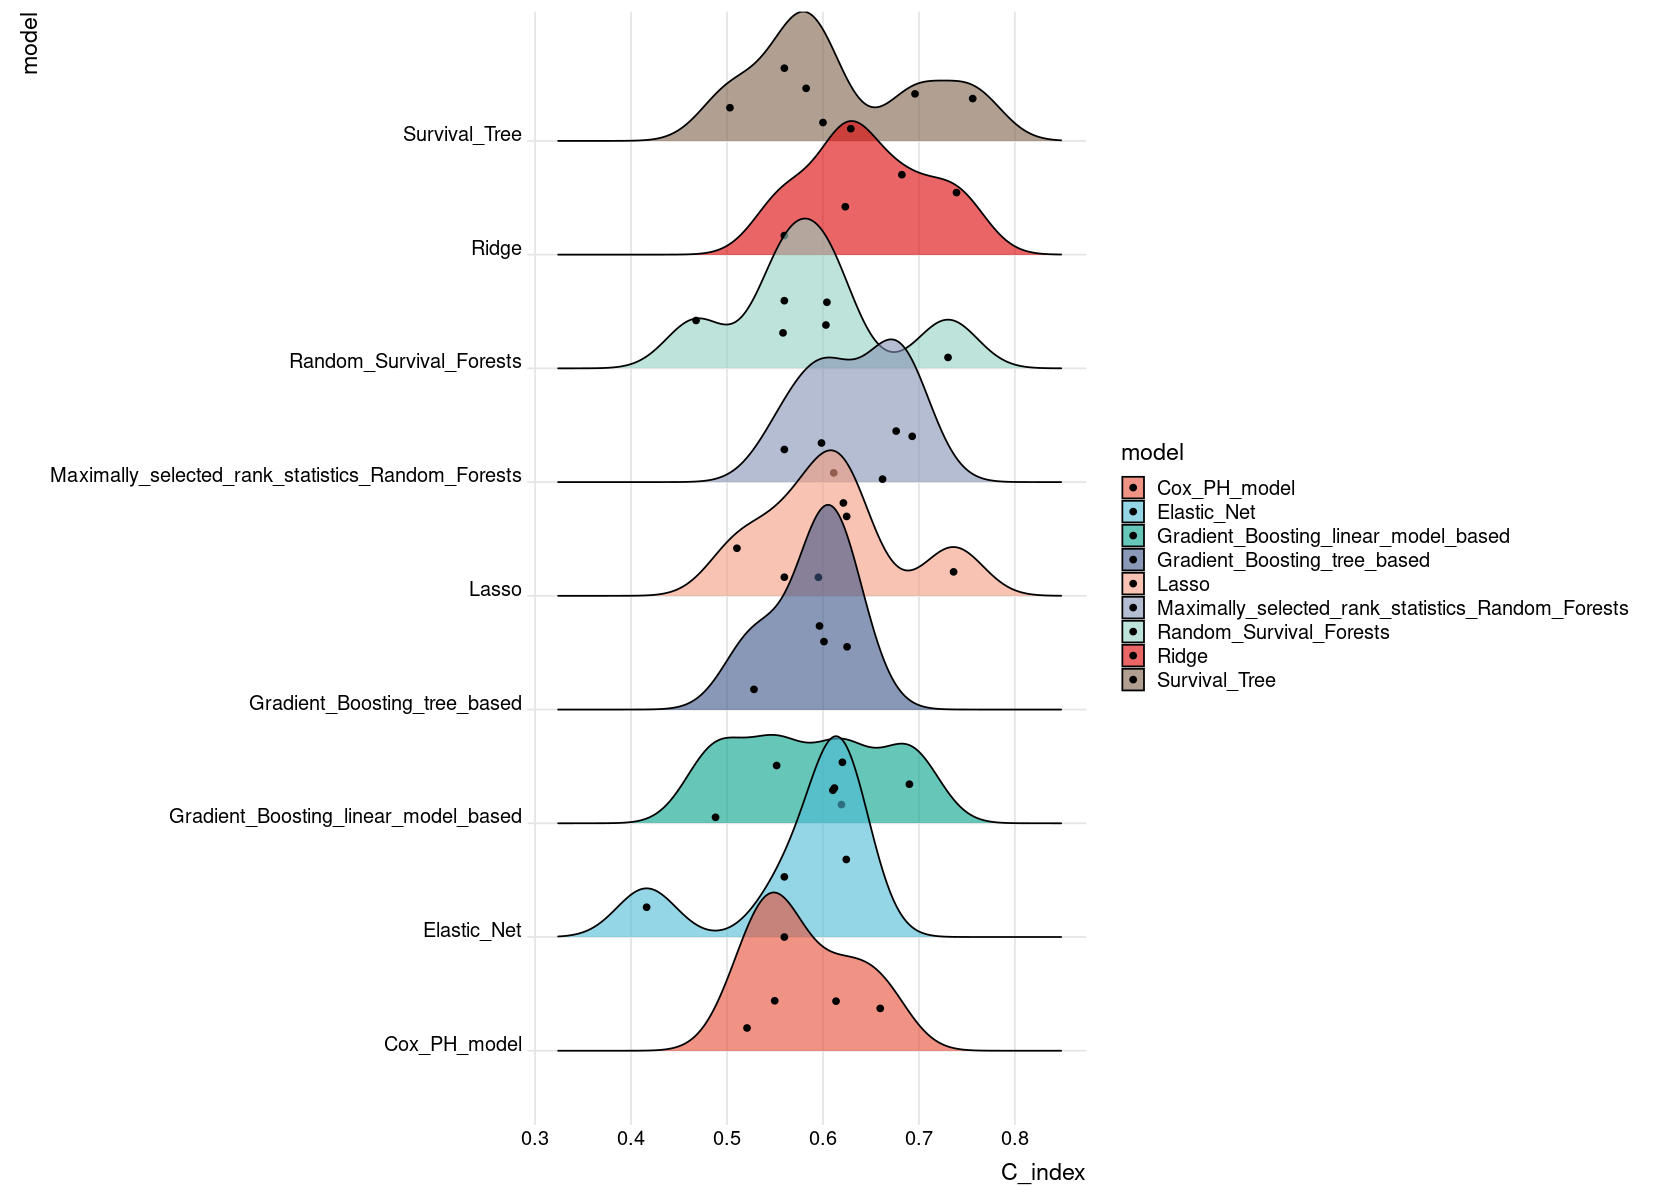

In [30]:
c_indices_df7 = get_stats(dataset_name = names(dfs)[7])

ggplot(c_indices_df7, aes(x = C_index, y = model, fill = model)) + 
       geom_density_ridges(jittered_points = TRUE) +
       #geom_density_ridges(stat = "binline", bins = 10) +
       theme_ridges() + 
       scale_fill_npg(alpha=0.6)

### GSE4922

Picking joint bandwidth of 0.0286



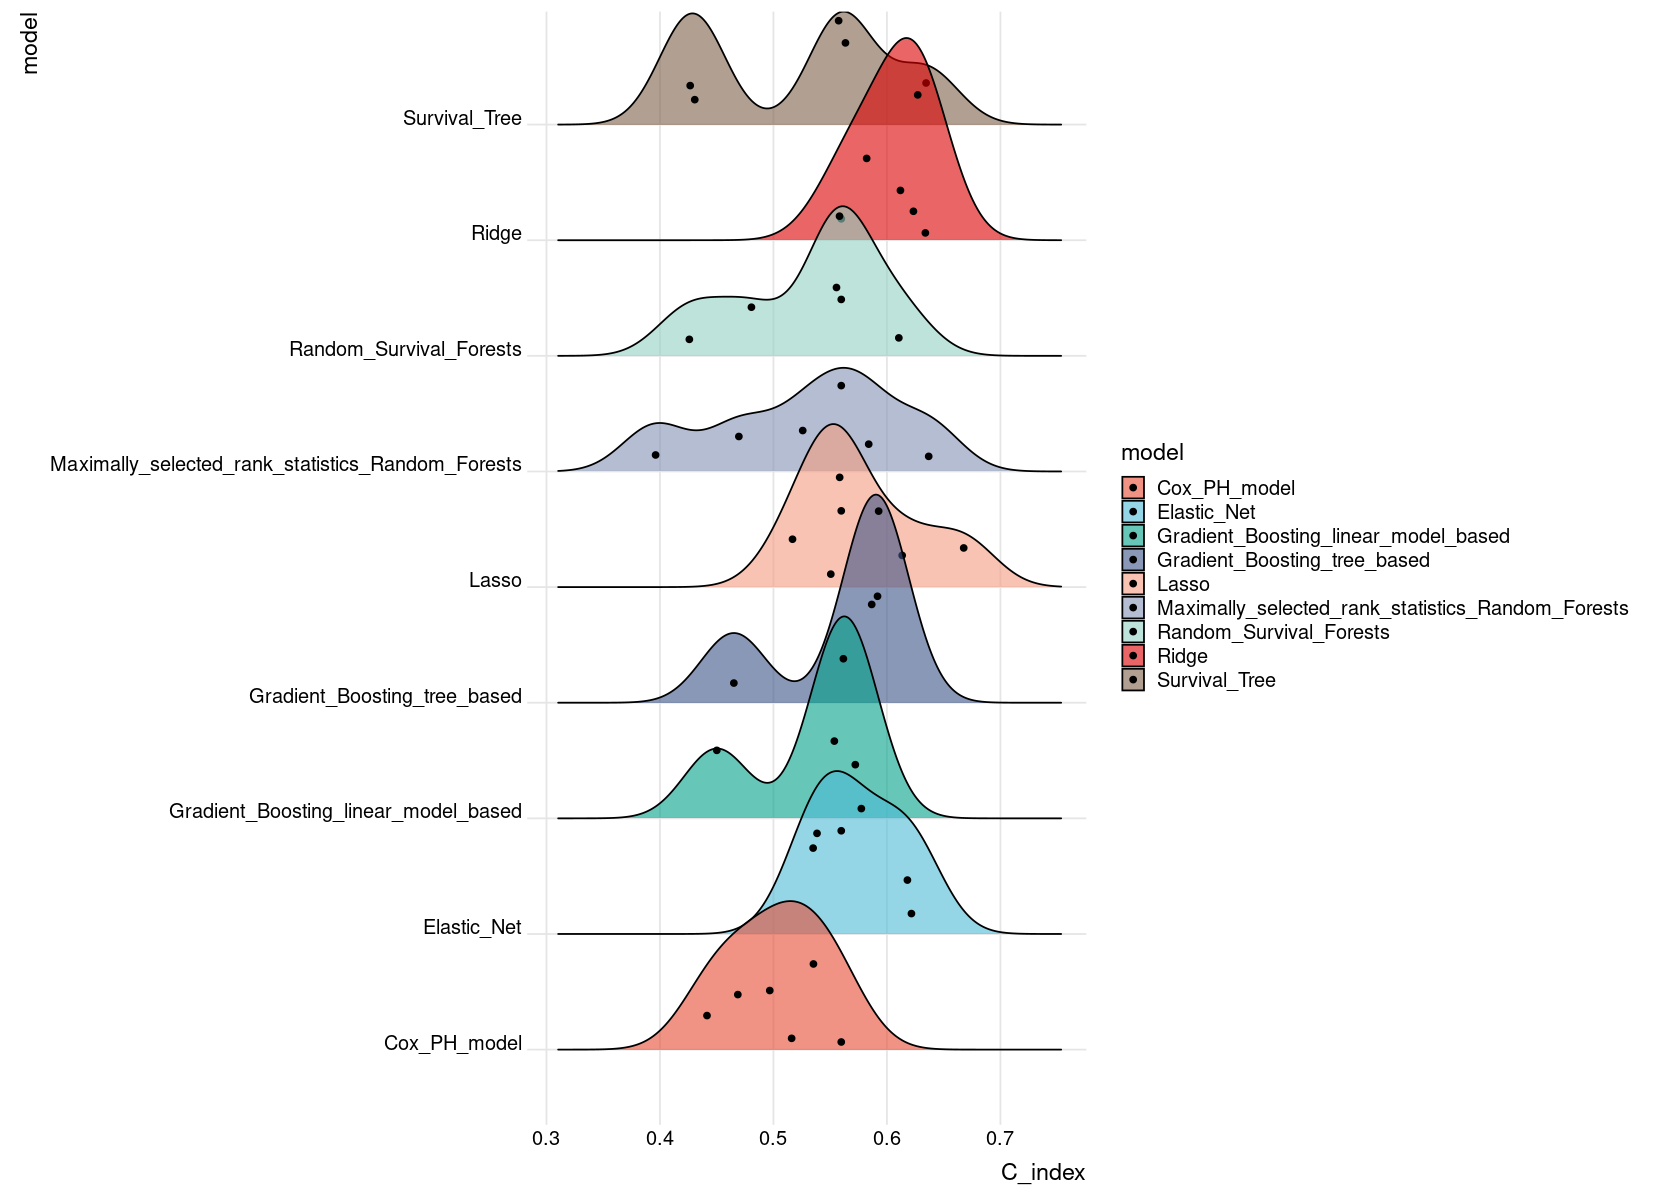

In [31]:
c_indices_df8 = get_stats(dataset_name = names(dfs)[8])

ggplot(c_indices_df8, aes(x = C_index, y = model, fill = model)) + 
       geom_density_ridges(jittered_points = TRUE) +
       #geom_density_ridges(stat = "binline", bins = 10) +
       theme_ridges() + 
       scale_fill_npg(alpha=0.6)

### Save

In [32]:
stats_sota = list(c_indices_df1,c_indices_df2,c_indices_df3,c_indices_df4,c_indices_df5, c_indices_df6,
                 c_indices_df7, c_indices_df8)

In [33]:
saveRDS(stats_sota, file = "../data_for_figures/stats_sota.rds")

## Tmp

In [50]:
look = function(df, C_thresh = 0.8){df[df$C_index>0.8,c("file_name", "C_index")] }

In [55]:
look(c_indices_df1)
look(c_indices_df2)
look(c_indices_df3)
look(c_indices_df4)

,file_name,C_index
,<chr>,<dbl>
28,ml_METABRIC_Maximally_selected_rank_statistics_Random_Forests_mrmr.rds,0.9305553
29,ml_METABRIC_Maximally_selected_rank_statistics_Random_Forests_party_cforest_importance.rds,0.9399013
30,ml_METABRIC_Maximally_selected_rank_statistics_Random_Forests_randomForestSRC_importance.rds,0.9327445
46,ml_METABRIC_Survival_Tree_mrmr.rds,0.9457947
47,ml_METABRIC_Survival_Tree_party_cforest_importance.rds,0.9564667
48,ml_METABRIC_Survival_Tree_randomForestSRC_importance.rds,0.9538059


,file_name,C_index
,<chr>,<dbl>
4,ml_GSE11121_Cox_PH_model_randomForestSRC_var_select_md.rds,0.8687634
10,ml_GSE11121_Elastic_Net_randomForestSRC_var_select_md.rds,0.8560818
NA,NA,NA
24,ml_GSE11121_Lasso_randomForestSRC_var_select_md.rds,0.9476096
30,ml_GSE11121_Maximally_selected_rank_statistics_Random_Forests_randomForestSRC_var_select_md.rds,0.8598165
36,ml_GSE11121_Random_Survival_Forests_randomForestSRC_var_select_md.rds,0.8327616
42,ml_GSE11121_Ridge_randomForestSRC_var_select_md.rds,0.8437597
45,ml_GSE11121_Survival_Tree_mrmr.rds,0.8691434


,file_name,C_index
,<chr>,<dbl>
26,ml_GSE96058_Maximally_selected_rank_statistics_Random_Forests_univariate_model_score.rds,0.9619539
32,ml_GSE96058_Random_Survival_Forests_univariate_model_score.rds,0.9720416
41,ml_GSE96058_Survival_Tree_univariate_model_score.rds,0.8267112


,file_name,C_index
,<chr>,<dbl>
5,ml_GSE7390_Cox_PH_model_univariate_model_score.rds,0.9000000
9,ml_GSE7390_Elastic_Net_univariate_model_score.rds,1.0000000
19,ml_GSE7390_Lasso_univariate_model_score.rds,1.0000000
23,ml_GSE7390_Maximally_selected_rank_statistics_Random_Forests_univariate_model_score.rds,0.8059576
31,ml_GSE7390_Ridge_univariate_model_score.rds,1.0000000


In [56]:
look(c_indices_df5)
look(c_indices_df6)
look(c_indices_df7)
look(c_indices_df8)

,file_name,C_index
,<chr>,<dbl>
8,ml_GSE9893_Elastic_Net_univariate_model_score.rds,0.9976744
18,ml_GSE9893_Lasso_univariate_model_score.rds,0.9989583
22,ml_GSE9893_Maximally_selected_rank_statistics_Random_Forests_univariate_model_score.rds,0.9636177
26,ml_GSE9893_Random_Survival_Forests_univariate_model_score.rds,0.9831196
30,ml_GSE9893_Ridge_univariate_model_score.rds,1.0000000


,file_name,C_index
,<chr>,<dbl>
8,ml_NKI_Elastic_Net_univariate_model_score.rds,1.0000000
18,ml_NKI_Lasso_univariate_model_score.rds,1.0000000
22,ml_NKI_Maximally_selected_rank_statistics_Random_Forests_univariate_model_score.rds,0.9703774
26,ml_NKI_Random_Survival_Forests_univariate_model_score.rds,0.9867320
30,ml_NKI_Ridge_univariate_model_score.rds,1.0000000
34,ml_NKI_Survival_Tree_univariate_model_score.rds,0.9096703


,file_name,C_index
,<chr>,<dbl>
NA,NA,NA
4,ml_TCGA_Cox_PH_model_univariate_model_score.rds,1
8,ml_TCGA_Elastic_Net_univariate_model_score.rds,1
18,ml_TCGA_Lasso_univariate_model_score.rds,1


,file_name,C_index
,<chr>,<dbl>
4,ml_GSE4922_Cox_PH_model_univariate_model_score.rds,1.0000000
8,ml_GSE4922_Elastic_Net_univariate_model_score.rds,1.0000000
18,ml_GSE4922_Lasso_univariate_model_score.rds,1.0000000
22,ml_GSE4922_Maximally_selected_rank_statistics_Random_Forests_univariate_model_score.rds,0.8885897
26,ml_GSE4922_Random_Survival_Forests_univariate_model_score.rds,0.9743439
30,ml_GSE4922_Ridge_univariate_model_score.rds,1.0000000
34,ml_GSE4922_Survival_Tree_univariate_model_score.rds,0.9199715
